<a href="https://colab.research.google.com/github/Mehul2711/CN-Project/blob/main/Copy_of_Heart_Attack_Risk_Prediction_India%7CML%7C70_55_%7C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ankushpanday2_heart_attack_risk_and_prediction_dataset_in_india_path = kagglehub.dataset_download('ankushpanday2/heart-attack-risk-and-prediction-dataset-in-india')

print('Data source import complete.')


100%|██████████| 269k/269k [00:00<00:00, 829kB/s]

Extracting files...
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Title:
## "Heart Attack Risk & Prediction Dataset – India (Cardiovascular Health Insights)"

## Dataset Description:
This dataset provides comprehensive cardiovascular health insights from individuals in India, focusing on heart attack risk factors and prediction. It includes key medical and lifestyle attributes essential for evaluating the likelihood of heart disease.

Features in the Dataset:

Demographic Information:

Age – Age of the individual

Gender – Male/Female

BMI – Body Mass Index (weight-to-height ratio)

## Medical History & Risk Factors:

Hypertension – 1 if present, 0 if not

Diabetes – 1 if present, 0 if not

Cholesterol Levels – LDL, HDL, and total cholesterol

Blood Pressure – Systolic & Diastolic values

Smoking Status – Yes/No

Alcohol Consumption – Yes/No

Physical Activity – Level of physical exercise

Family History of Heart Disease – Yes/No

Previous Cardiovascular Events – Prior heart attack or stroke

## Symptoms & Clinical Tests:

Chest Pain Type – Typical/atypical angina, non-anginal pain

Resting ECG Results – Normal/abnormal

Heart Rate Variability – Measured in BPM

Exercise-Induced Angina – Yes/No

ST Depression & Elevation – ECG readings post-exercise

Thallium Stress Test Results – Normal/abnormal

## Outcome Variable:

Heart Attack Risk (Target Variable) – 1 (High Risk), 0 (Low Risk)


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [ ]:
df = pd.read_csv(ankushpanday2_heart_attack_risk_and_prediction_dataset_in_india_path + "/heart_attack_prediction_india.csv")

In [ ]:
df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [ ]:
df.tail()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0
9999,10000,Haryana,25,Female,0,1,0,1,0,1,...,89,1,0,4,0,1,366,1732794,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [ ]:
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


In [ ]:
df.corr

<bound method DataFrame.corr of       Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  \
0              1         Rajasthan   42  Female         0             0   
1              2  Himachal Pradesh   26    Male         0             0   
2              3             Assam   78    Male         0             0   
3              4            Odisha   58    Male         1             0   
4              5         Karnataka   22    Male         0             0   
...          ...               ...  ...     ...       ...           ...   
9995        9996       Maharashtra   20  Female         0             0   
9996        9997         Rajasthan   34  Female         0             0   
9997        9998           Gujarat   76    Male         0             0   
9998        9999    Andhra Pradesh   52    Male         0             0   
9999       10000           Haryana   25  Female         0             1   

      Obesity  Smoking  Alcohol_Consumption  Physical_Activity  ...  \
0           1        1                    0                  0  ...   
1           0        0                    1                  1  ...   
2           1        0                    0                  1  ...   
3           1        0                    0                  1  ...   
4           0        0                    0                  1  ...   
...       ...      ...                  ...                ...  ...   
9995        0        1                    0                  1  ...   
9996        0        0                    0                  0  ...   
9997        0        0                    0                  0  ...   
9998        0        0                    0                  1  ...   
9999        0        1                    0                  1  ...   

      Diastolic_BP  Air_Pollution_Exposure  Family_History  Stress_Level  \
0              119                       1               0             4   
1              115                       0               0             7   
2              117                       0               1            10   
3               65                       0               0             1   
4              109                       0               0             9   
...            ...                     ...             ...           ...   
9995            74                       1               1            10   
9996            78                       0               1             1   
9997            98                       1               0             1   
9998            60                       1               0             7   
9999            89                       1               0             4   

      Healthcare_Access  Heart_Attack_History  Emergency_Response_Time  \
0                     0                     0                      157   
1                     0                     0                      331   
2                     1                     0                      186   
3                     1                     1                      324   
4                     0                     0                      209   
...                 ...                   ...                      ...   
9995                  0                     0                      167   
9996                  0                     0                      123   
9997                  0                     1                      376   
9998                  1                     0                      313   
9999                  0                     1                      366   

      Annual_Income  Health_Insurance  Heart_Attack_Risk  
0            611025                 0                  0  
1            174527                 0                  0  
2           1760112                 1                  0  
3           1398213                 0                  0  
4             97987                 0                  1  
...             ...               ...                ...  

In [ ]:
df.shape

(10000, 26)

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
State_Name,0
Age,0
Gender,0
Diabetes,0
Hypertension,0
Obesity,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity,0


In [ ]:
df.columns

Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')

## Data Visulization

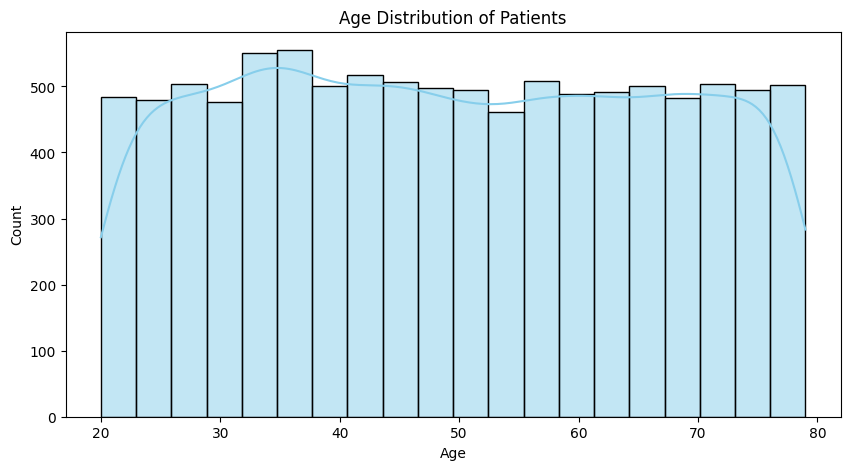

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='red')
plt.title('Boxplot of Age')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='State_Name', order=df['State_Name'].value_counts().index, palette="coolwarm")
plt.title('Number of Patients in Each State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
smoking_alcohol = df.groupby(['Smoking', 'Alcohol_Consumption'])['Patient_ID'].count().unstack()
smoking_alcohol.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Smoking & Alcohol Consumption Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Alcohol Consumption')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart_Attack_Risk', y='Diet_Score', data=df, palette="coolwarm")
plt.title('Diet Score Distribution Across Heart Attack Risk Levels')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Diabetes', 'Hypertension', 'Cholesterol_Level', 'LDL_Level', 'HDL_Level', 'Heart_Attack_Risk']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Medical Risk Factors')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Systolic_BP', y='Diastolic_BP', hue='Heart_Attack_Risk', data=df, palette="coolwarm")
plt.title('Systolic vs. Diastolic BP and Heart Attack Risk')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Heart_Attack_Risk', y='LDL_Level', data=df, palette="coolwarm")
plt.title('LDL Cholesterol Levels vs. Heart Attack Risk')
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Heart_Attack_Risk', y='Air_Pollution_Exposure', data=df, palette="coolwarm")
plt.title('Air Pollution Exposure vs. Heart Attack Risk')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart_Attack_Risk', y='Annual_Income', data=df, palette="coolwarm")
plt.title('Annual Income vs. Heart Attack Risk')
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Healthcare_Access', hue='Heart_Attack_Risk', palette="coolwarm")
plt.title('Healthcare Access vs. Heart Attack Risk')
plt.show()


In [ ]:
numeric_cols = ['Age', 'Cholesterol_Level', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Annual_Income', 'Air_Pollution_Exposure', 'Heart_Attack_Risk']
sns.pairplot(df[numeric_cols], hue="Heart_Attack_Risk", palette="coolwarm")
plt.suptitle('Pair Plot of Key Numeric Features', y=1.02)
plt.show()

## EDA

In [ ]:
binary_vars = ['Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption',
               'Physical_Activity', 'Family_History', 'Healthcare_Access',
               'Heart_Attack_History', 'Health_Insurance']

In [ ]:
risk_rates = pd.DataFrame({
    'Variable': binary_vars,
    'Risk_Rate_0': [df[df[var] == 0]['Heart_Attack_Risk'].mean() for var in binary_vars],
    'Risk_Rate_1': [df[df[var] == 1]['Heart_Attack_Risk'].mean() for var in binary_vars]
})

In [ ]:
risk_diff = risk_rates['Risk_Rate_1'] - risk_rates['Risk_Rate_0']
risk_diff_df = pd.DataFrame({'Variable': binary_vars, 'Risk_Difference': risk_diff})

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Risk_Difference', data=risk_diff_df)
plt.title('Difference in Heart Attack Risk for Binary Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
numerical_vars = ['Age', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level',
                  'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP',
                  'Air_Pollution_Exposure', 'Stress_Level', 'Emergency_Response_Time',
                  'Annual_Income']

In [ ]:
corr_vars = [col for col in df.columns if col not in ['State_Name', 'Gender']]
corr_matrix = df[corr_vars].corr()

In [ ]:
corr_stack = corr_matrix.stack().reset_index()
corr_stack.columns = ['var1', 'var2', 'corr']
high_corr_pairs = corr_stack[(abs(corr_stack['corr']) > 0.5) & (corr_stack['var1'] != corr_stack['var2'])]
if high_corr_pairs.empty:
    print("There are no highly correlated pairs with corr > 0.5 in the dataset.")
else:
    print("Highly correlated pairs found:")
    print(high_corr_pairs)

In [ ]:
key_vars = ['Age', 'Cholesterol_Level', 'Systolic_BP', 'Heart_Attack_Risk']
sns.pairplot(df[key_vars], hue='Heart_Attack_Risk')
plt.show()

## ML ALgorithms

In [ ]:
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_cols = ['State_Name', 'Gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Import Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

In [ ]:
accuracy_results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    accuracy_results[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.2f}%")

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.xlabel("ML Model")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

# Thank you...pls upvote!!!